<a href="https://colab.research.google.com/github/Rao7079/Zomato_Python_Project/blob/main/zomato_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things to store the different different library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe=pd.read_csv("Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### **now clean the data covert the data type of column -rate**

In [ ]:
def handledata(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)
dataframe['rate']=dataframe['rate'].apply(handledata)
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


***1-> what type of resturant do the majority of customers order now ***

In [ ]:
majority_values=dataframe['listed_in(type)'].mode()
print(majority_values)

0    Dining
Name: listed_in(type), dtype: object


Text(0.5, 0, 'type of resturant')

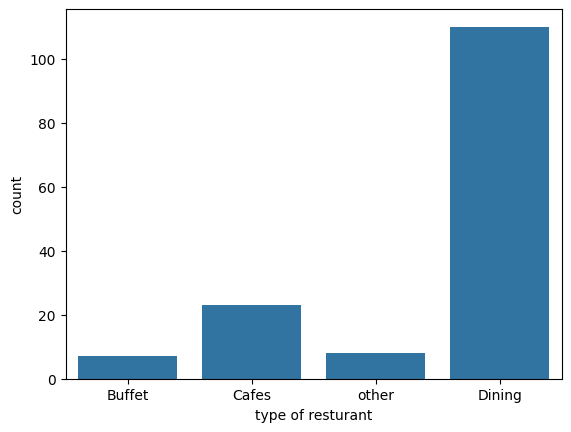

In [ ]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of resturant")




*conclusion - majority of order through dinning table*

**2-> How many votes has each type of resturant received from customer**



Text(0, 0.5, 'votes')

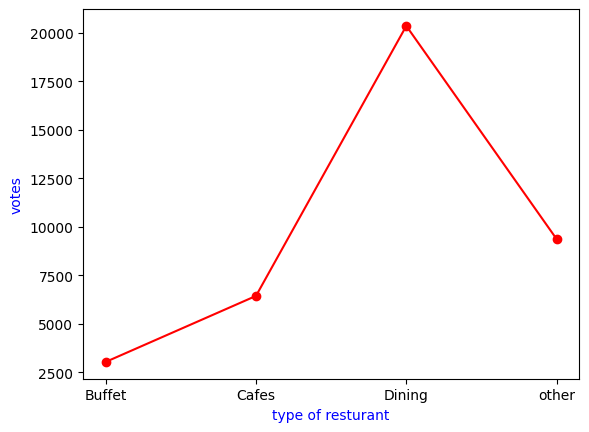

In [ ]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame({'votes': grouped_data})
plt.plot(result,c="red",marker="o")
plt.xlabel("type of resturant",c="blue")
plt.ylabel('votes',c="blue")


conclusion:- Dinning resturant has received more votes

### **3-> what are the rating that the  majority  of resturant received**

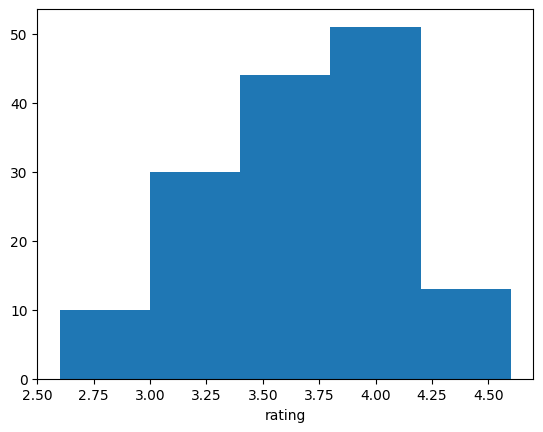

In [ ]:
plt.hist(dataframe['rate'],bins=5)
plt.title=("rating of resturant")
plt.xlabel("rating")
plt.show()

Conclusion:-majority resturant received ratings from 3.50 from 4.25

4->Zomato has observed that most couples order most of thier food online. what is their average spending on each other




<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

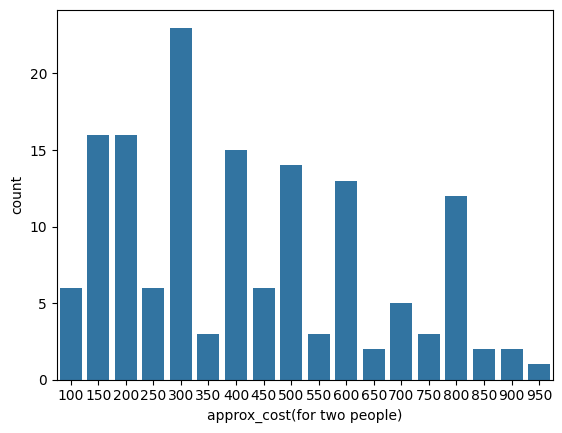

In [ ]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

5->which modes(online or offline)has received the maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

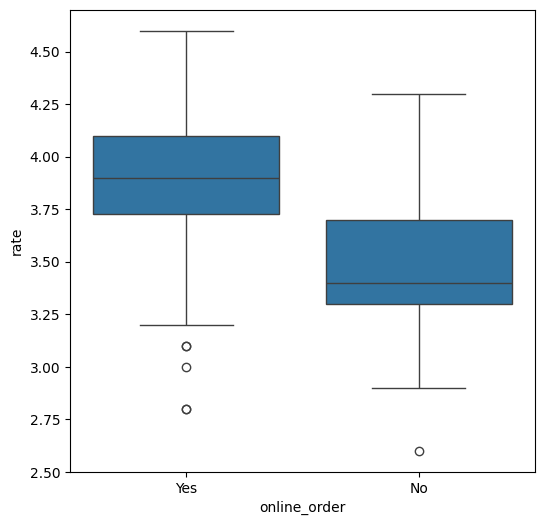

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)


conclusion:- online rating is good as compare offline

6->which type of resturant recieved more offline orders,so that zomato can provides those customers with some good offers

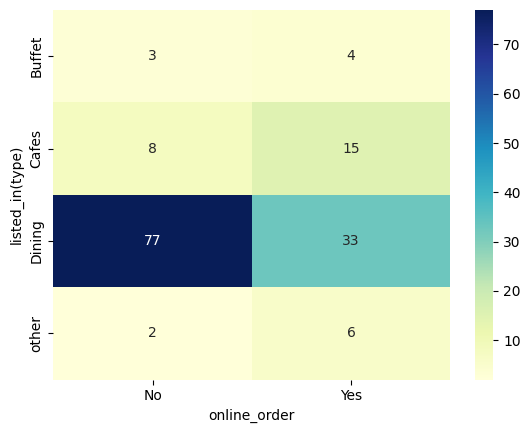

In [ ]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table ,annot=True,cmap='YlGnBu',fmt='d')
plt.show()